In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import time as t
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, auc,roc_curve
from sklearn.neighbors import KNeighborsClassifier
import sklearn.discriminant_analysis
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
seismicdata=pd.read_csv('/Users/anandramesh/Desktop/Term 1/ML/ML final project/seismic_editl.csv')
print("Shape of the dataset:-",seismicdata.shape)

Shape of the dataset:- (3604, 19)


In [3]:
seismicdata.head

<bound method NDFrame.head of      seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls ghazard  \
0          a              a     N    15180     48       -72     -72       a   
1          a              a     N    14720     33       -70     -79       a   
2          a              a     N     8050     30       -81     -78       a   
3          a              a     N    28820    171       -23      40       a   
4          a              a     N    12640     57       -63     -52       a   
5          a              a     W    63760    195       -73     -65       a   
6          a              a     W   207930    614        -6      18       a   
7          a              a     N    48990    194       -27      -3       a   
8          a              a     N   100190    303        54      52       a   
9          a              a     W   247620    675         4      25       a   
10         a              a     N    41950    135       -39     -36       a   
11         a          

In [4]:
seismicdata.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,3.604000e+03,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.000000,3604.0,3604.0,3604.0,3604.000000,3604.000000,3604.000000
mean,1.215640e+05,659.194506,12.629023,5.976415,1.220588,0.561876,0.561321,0.090178,0.004994,0.0,0.0,0.0,6249.445061,5109.503330,0.330189
std,2.565078e+05,664.698447,76.230873,61.448979,1.637375,0.913889,0.937907,0.325480,0.070505,0.0,0.0,0.0,19913.185219,18290.913648,0.470346
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.502500e+04,224.000000,-37.000000,-33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,3.162000e+04,442.000000,-5.000000,-4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,300.000000,300.000000,0.000000
75%,7.165250e+04,805.000000,41.000000,30.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,4200.000000,3000.000000,1.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


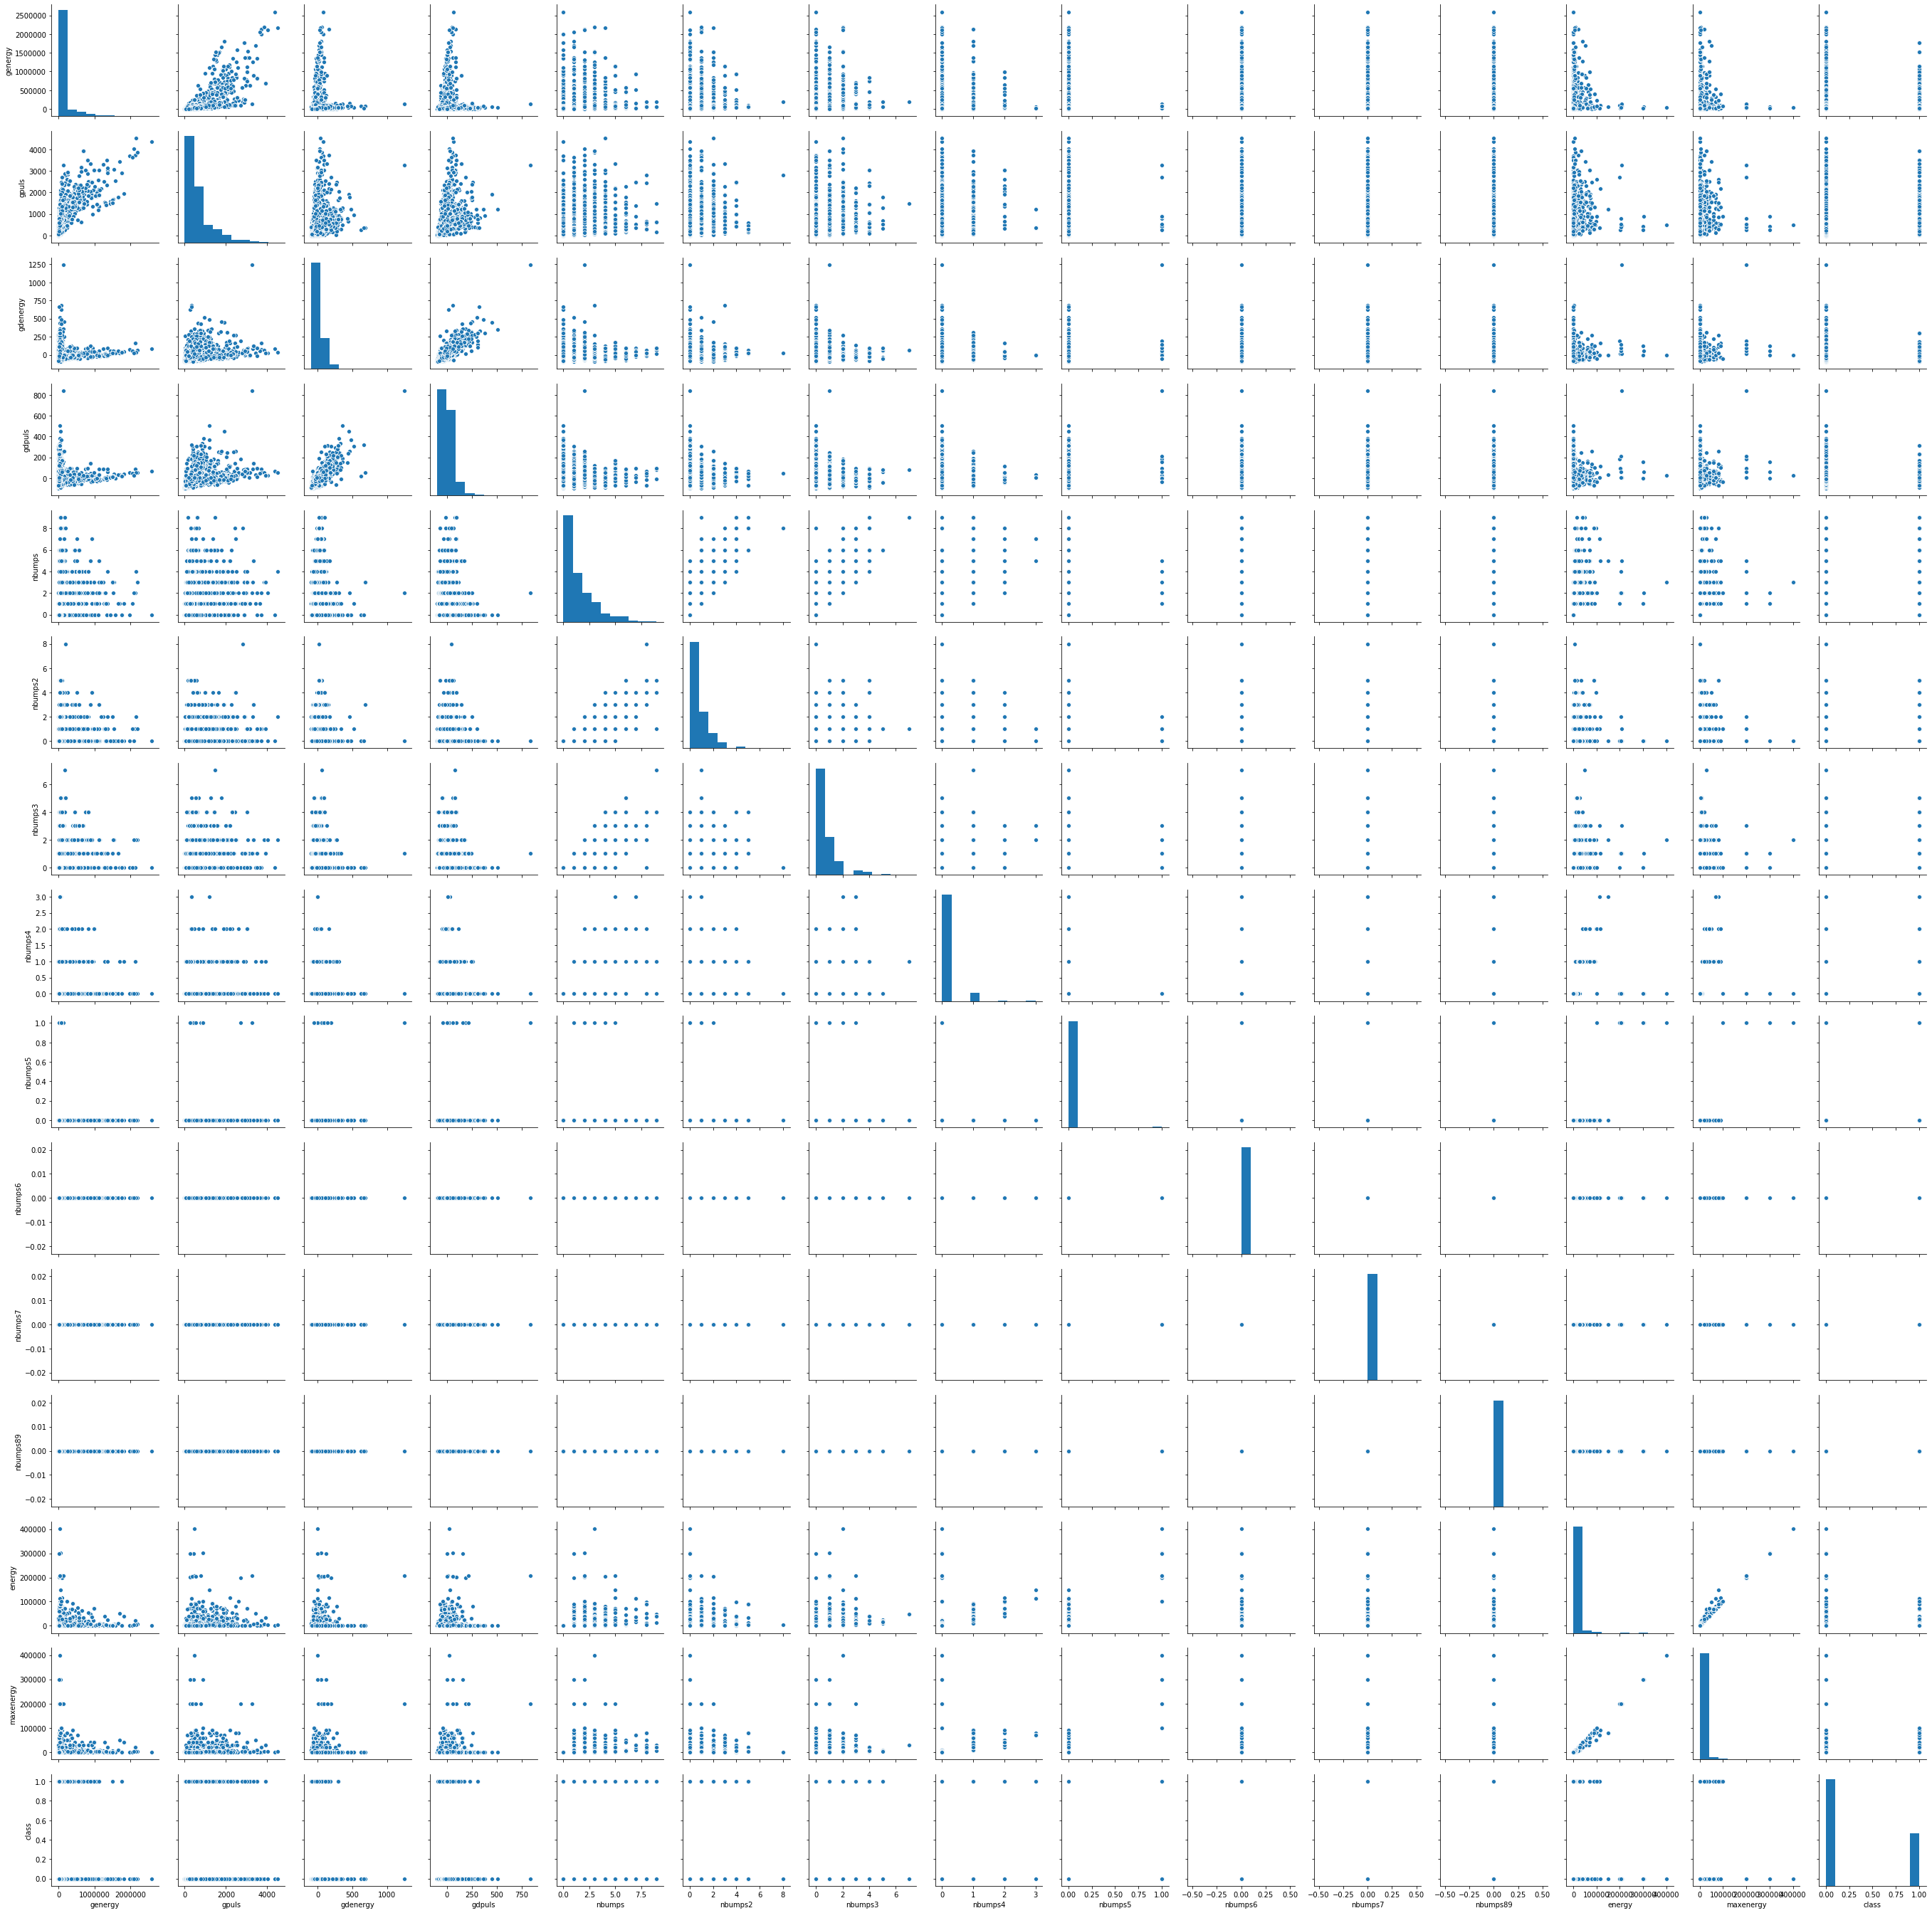

In [5]:
sn.pairplot(seismicdata)

## Data preprocessing

### Encoding the dataset

In [6]:
seismicdata['seismic']=seismicdata['seismic'].map({'a':0,'b':1})
seismicdata['seismoacoustic']=seismicdata['seismoacoustic'].map({'a':0,'b':1,'c':2})
seismicdata['shift']=seismicdata['shift'].map({'N':0,'W':1})
seismicdata['ghazard']=seismicdata['ghazard'].map({'a':0,'b':1, 'c':2})

In [7]:
Final_Data = pd.DataFrame(columns=['Model implemented','True Negatives','False Positives',
                                   'False Negatives','True Positives','Accuracy score',
                                   'Train data time taken','Test data time taken','Mean','Variance'])
Final_Data

,Model implemented,True Negatives,False Positives,False Negatives,True Positives,Accuracy score,Train data time taken,Test data time taken,Mean,Variance


In [8]:
seismicdata.groupby('class').count()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
class,,,,,,,,,,,,,,,,,,
0,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414
1,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190,1190


In [9]:
# Splitting the target and dependent columns
x=seismicdata.drop('class',axis=1)
y=seismicdata['class']

### Scaling the data

In [10]:
scalar=StandardScaler()
scaled_data = scalar.fit_transform(x)
scaled_data.shape

(3604, 18)

### Splitting the test and train data

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_data,y,test_size=0.25,random_state=0)

In [12]:
xtrain

array([[-0.8082147 ,  1.11396911, -1.58838649, ...,  0.        ,
        -0.16320322, -0.11534667],
       [-0.8082147 ,  1.11396911,  0.62956969, ...,  0.        ,
        -0.31387808, -0.2793853 ],
       [ 1.23729498,  1.11396911,  0.62956969, ...,  0.        ,
         0.96183569,  0.81420552],
       ...,
       [ 1.23729498, -0.77977838, -1.58838649, ...,  0.        ,
        -0.31387808, -0.2793853 ],
       [ 1.23729498, -0.77977838,  0.62956969, ...,  0.        ,
        -0.00750587, -0.00598759],
       [ 1.23729498, -0.77977838,  0.62956969, ...,  0.        ,
        -0.31387808, -0.2793853 ]])

## Model fitting

### KNN model fit

In [13]:
knn=KNeighborsClassifier(n_neighbors=3)
time_start_train=t.perf_counter()
knn.fit(xtrain,ytrain)
time_elapsed_train = (t.perf_counter() - time_start_train)
time_start_predict=t.perf_counter()
knn_ypredict=knn.predict(xtest)
time_elapsed_predict = (t.perf_counter() - time_start_predict)
acc_knn=accuracy_score(knn_ypredict,ytest)
truenegative,falsepositive,falsenegative,truepositive=confusion_matrix(knn_ypredict,ytest).ravel() 

In [14]:
Final_Data

,Model implemented,True Negatives,False Positives,False Negatives,True Positives,Accuracy score,Train data time taken,Test data time taken,Mean,Variance


In [15]:
cv_scores_knn = cross_val_score(knn, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')

In [16]:
cv_scores_knn = cross_val_score(knn, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')

In [17]:
print ("Accuracy of KNN base model fit:-\n", acc_knn)
print ("KNN base model fit matrix:-\n", confusion_matrix(knn_ypredict,ytest))
print("Cross validation scores for KNN",cv_scores_knn)
print('mean', cv_scores_knn.mean())
print('variance', cv_scores_knn.var())
print('Time taken to train data:',time_elapsed_train)
print('Time Taken for test data:',time_elapsed_predict)

Accuracy of KNN base model fit:-
 0.9089900110987791
KNN base model fit matrix:-
 [[527   0]
 [ 82 292]]
Cross validation scores for KNN [0.95317052 0.95387612 0.95041836]
mean 0.9524883337804141
variance 2.2253692374868678e-06
Time taken to train data: 0.006580947000003334
Time Taken for test data: 0.07110368300000403


### Getting best scores for KNN

In [18]:
range_i = range(1,100)
scores_i = []

for i in range_i:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn_scores = cross_val_score(knn, x, y,cv=StratifiedKFold(shuffle=True), scoring='roc_auc')
    scores_i.append(knn_scores.mean())

print(scores_i)

[0.9585743642038257, 0.9585979460249415, 0.9517544329669363, 0.9431325872952138, 0.9174856706704947, 0.8946360098223645, 0.8693571020257324, 0.8598590696745744, 0.8485043061725891, 0.8474842386004697, 0.8414080229646025, 0.8308138875678633, 0.8246793588355716, 0.8243025774235538, 0.8177549224744799, 0.8093569256558624, 0.8068776842457176, 0.8088553027946488, 0.8023323483251046, 0.7914769008725221, 0.7936351876971273, 0.780921908739837, 0.780951756722752, 0.7802031168206295, 0.779807927849078, 0.7755240992375771, 0.7748616758361834, 0.7738223488090951, 0.7666479530733548, 0.7692274413262582, 0.7690886191268036, 0.7677216662448005, 0.7692624022542542, 0.7613610043748634, 0.7655200293763652, 0.7650748743360819, 0.7670315199946912, 0.7659278274621025, 0.7651065483120778, 0.758705908117908, 0.7666086256517729, 0.7628453529706559, 0.768044480389103, 0.7691695038650642, 0.7657299077379399, 0.7654473627494672, 0.7653025258359903, 0.7687126318710895, 0.7647326823822372, 0.7713351134972358, 0.77

In [19]:
print('Maximum score:' , max(scores_i))

Maximum score: 0.9585979460249415


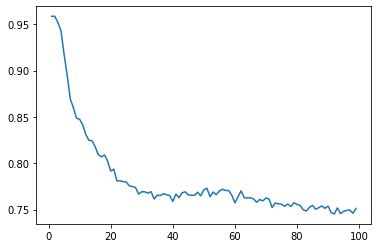

In [20]:
plt.plot(range_i,scores_i)

In [21]:
knn_2= KNeighborsClassifier()
param_grid= {'n_neighbors':np.arange(1,100)}
knn_search=GridSearchCV(knn_2, param_grid, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')
knn_search.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
            

In [22]:
knn_search.best_params_

{'n_neighbors': 1}

In [23]:
knn_search.best_score_

0.9558825329992416

### ROC curve for KNN 

In [24]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
score_y = knn.predict_proba(xtest)

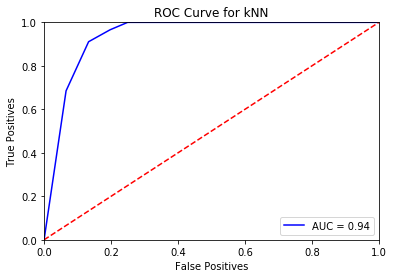

In [25]:
fp, tp, threshold = roc_curve(ytest, score_y[:, 1])
roc_auc = auc(fp, tp)

plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positives')
plt.xlabel('False Positives')
plt.title('ROC Curve for kNN')
plt.show()

In [26]:
Final=pd.DataFrame({"Model implemented":"KNN","True Negatives":truenegative,"False Positives":falsepositive,
                    "False Negatives":falsenegative,"True Positives":truepositive, "Accuracy score":[acc_knn],
                    'Train data time taken':time_elapsed_train,
                    'Test data time taken':time_elapsed_predict,
                    'Mean':cv_scores_knn.mean(), 'Variance': cv_scores_knn.var(), 'AUC' :roc_auc })
Final_Data=Final_Data.append(Final)  

In [27]:
Final_Data

,AUC,Accuracy score,False Negatives,False Positives,Mean,Model implemented,Test data time taken,Train data time taken,True Negatives,True Positives,Variance
0,0.938362,0.90899,82,0,0.952488,KNN,0.071104,0.006581,527,292,0.000002


### Naive Bayes model fit

In [28]:
nb=GaussianNB()
time_start_train=t.perf_counter()
nb.fit(xtrain,ytrain)
time_elapsed_train = (t.perf_counter() - time_start_train)
time_start_predict=t.perf_counter()
nb_ypredict =nb.predict(xtest)
time_elapsed_predict = (t.perf_counter() - time_start_predict)
acc_nb=accuracy_score(nb_ypredict,ytest)
truenegative,falsepositive,falsenegative,truepositive=confusion_matrix(nb_ypredict,ytest).ravel() 

In [29]:
cv_scores_nb = cross_val_score(nb, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')

In [30]:
print ("Accuracy of Random forest base model fit:-\n", acc_nb)
print ("Random forest base model confusion matrix:-\n", confusion_matrix(nb_ypredict,ytest))
print("Cross validation scores for Naive bayes", cv_scores_nb)
print('Mean', cv_scores_nb.mean())
print('Variance', cv_scores_nb.var())
print('Time taken to train data:',time_elapsed_train)
print('Time Taken for test data:',time_elapsed_predict)

Accuracy of Random forest base model fit:-
 0.7203107658157603
Random forest base model confusion matrix:-
 [[497 140]
 [112 152]]
Cross validation scores for Naive bayes [0.70773347 0.65883881 0.6725338 ]
Mean 0.6797020230284039
Variance 0.000424139708775669
Time taken to train data: 0.006826979999999594
Time Taken for test data: 0.00127124700000536


### ROC for Naive Baiyes

In [31]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)
score_y = nb.predict_proba(xtest)

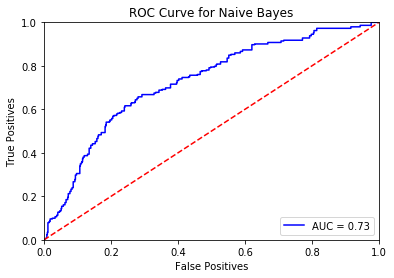

In [32]:
fp, tp, threshold = roc_curve(ytest, score_y[:, 1])
roc_auc = auc(fp, tp)

plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positives')
plt.xlabel('False Positives')
plt.title('ROC Curve for Naive Bayes')
plt.show()

In [33]:
Final=pd.DataFrame({"Model implemented":"Naive Bayes","True Negatives":truenegative,"False Positives":falsepositive,
                    "False Negatives":falsenegative,"True Positives":truepositive, "Accuracy score":[acc_nb],
                    'Train data time taken':time_elapsed_train,
                    'Test data time taken':time_elapsed_predict,
                    'Mean':cv_scores_nb.mean(), 'Variance': cv_scores_nb.var(), 'AUC' :roc_auc })
Final_Data=Final_Data.append(Final)  

In [34]:
Final_Data

,AUC,Accuracy score,False Negatives,False Positives,Mean,Model implemented,Test data time taken,Train data time taken,True Negatives,True Positives,Variance
0,0.938362,0.908990,82,0,0.952488,KNN,0.071104,0.006581,527,292,0.000002
0,0.726182,0.720311,112,140,0.679702,Naive Bayes,0.001271,0.006827,497,152,0.000424


### Random forest model fit

In [35]:
randfor=RandomForestClassifier(n_estimators=12)
time_start_train=t.perf_counter()
randfor.fit(xtrain,ytrain)
time_elapsed_train = (t.perf_counter() - time_start_train)
time_start_predict=t.perf_counter()
rf_ypredict =randfor.predict(xtest)
time_elapsed_predict = (t.perf_counter() - time_start_predict)
acc_rf=accuracy_score(rf_ypredict,ytest)
truenegative,falsepositive,falsenegative,truepositive=confusion_matrix( rf_ypredict,ytest).ravel() 

In [36]:
cv_scores_rf = cross_val_score(randfor, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')

In [37]:
print ("Accuracy of Random forest base model fit:-\n", acc_rf)
print ("Random forest base model confusion matrix:-\n", confusion_matrix(rf_ypredict,ytest))
print("Cross validation scores for Naive bayes", cv_scores_rf)
print('mean', cv_scores_rf.mean())
print('variance', cv_scores_rf.var())
print('Time taken to train data:',time_elapsed_train)
print('Time Taken for test data:',time_elapsed_predict)

Accuracy of Random forest base model fit:-
 0.9755826859045506
Random forest base model confusion matrix:-
 [[587   0]
 [ 22 292]]
Cross validation scores for Naive bayes [0.99903781 0.99817419 0.99980527]
mean 0.9990057586403015
variance 4.439130720001166e-07
Time taken to train data: 0.03664303800000823
Time Taken for test data: 0.006735898000002294


### Getting the best scores of random forest

In [38]:
range_i = range(1,100)
scores_i = []

for i in range_i:
    rf=RandomForestClassifier(n_estimators=i)
    rf_scores = cross_val_score(rf, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')
    scores_i.append(rf_scores.mean())

print(scores_i)

[0.9306031359416416, 0.9744666107981975, 0.9897804239170114, 0.9927097097203946, 0.9954509278055582, 0.9973298634199311, 0.9974149277145815, 0.9936909969725475, 0.9956040614473446, 0.9983165345242574, 0.9986861501316454, 0.9992438072445063, 0.9993775617843769, 0.9995343137025006, 0.9992042716508323, 0.9997082892101862, 0.9990649748701124, 0.9994624437298402, 0.9997898731111841, 0.9993390170875697, 0.9995763338839057, 0.9994650394748184, 0.9998393199405035, 0.9997529405466277, 0.9978055760447737, 0.9998706282255033, 0.9996627526222902, 0.999741049892334, 0.999424149260507, 0.9999733538263884, 0.9999713071322326, 0.9938362735158687, 0.9998680462511033, 0.9998769237187811, 0.999663323312593, 0.9998429665737157, 0.9996672768329761, 0.9998865550236494, 0.9996190463337499, 0.9996910734895259, 0.994836059614351, 0.9998511946620727, 0.9999227378803871, 0.9985038182580886, 0.9997758061207754, 0.999909650958096, 0.9998634689253302, 0.999515214762318, 0.9998063310602029, 0.9998929036320146, 0.999

In [39]:
print('Maximum score:' , max(scores_i))

Maximum score: 1.0


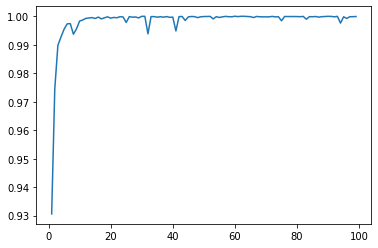

In [40]:
plt.plot(range_i,scores_i)

In [41]:
rf_2= RandomForestClassifier()
param_grid= {'n_estimators':np.arange(1,100)}
rf_search=GridSearchCV(rf_2, param_grid, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')
rf_search.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fract...
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 

In [42]:
rf_search.best_params_

{'n_estimators': 57}

In [43]:
rf_search.best_score_

0.9998473999505817

### ROC for Random forest

In [44]:
rf = RandomForestClassifier(n_estimators=2)
rf.fit(xtrain,ytrain)
score_y = rf.predict_proba(xtest)

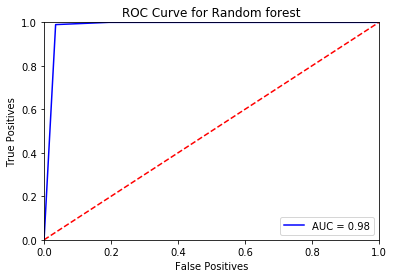

In [45]:
fp, tp, threshold = roc_curve(ytest, score_y[:, 1])
roc_auc = auc(fp, tp)

plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positives')
plt.xlabel('False Positives')
plt.title('ROC Curve for Random forest')
plt.show()

In [46]:
Final=pd.DataFrame({"Model implemented":"Random Forest","True Negatives":truenegative,
                    "False Positives":falsepositive,
                    "False Negatives":falsenegative,"True Positives":truepositive, "Accuracy score":[acc_rf],
                    'Train data time taken':time_elapsed_train,
                    'Test data time taken':time_elapsed_predict,
                    'Mean':cv_scores_rf.mean(), 'Variance': cv_scores_rf.var(), 'AUC' :roc_auc })
Final_Data=Final_Data.append(Final)  

In [47]:
Final_Data

,AUC,Accuracy score,False Negatives,False Positives,Mean,Model implemented,Test data time taken,Train data time taken,True Negatives,True Positives,Variance
0,0.938362,0.908990,82,0,0.952488,KNN,0.071104,0.006581,527,292,2.225369e-06
0,0.726182,0.720311,112,140,0.679702,Naive Bayes,0.001271,0.006827,497,152,4.241397e-04
0,0.981763,0.975583,22,0,0.999006,Random Forest,0.006736,0.036643,587,292,4.439131e-07


### Ada boost model fit 

In [48]:
ada_boost=AdaBoostClassifier(n_estimators=12, random_state=0)
time_start_train=t.perf_counter()
ada_boost.fit(xtrain,ytrain)
time_elapsed_train = (t.perf_counter() - time_start_train)
time_start_predict=t.perf_counter()
adaboost_ypredict =ada_boost.predict(xtest)
time_elapsed_predict = (t.perf_counter() - time_start_predict)
acc_adaboost=accuracy_score(adaboost_ypredict,ytest)
truenegative,falsepositive,falsenegative,truepositive=confusion_matrix( adaboost_ypredict,ytest).ravel() 

In [49]:
adaboost_scores = cross_val_score(ada_boost, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')

In [50]:
print ("Accuracy of Ada boost base model fit:-\n", acc_adaboost)
print ("Ada boost base model confusion matrix:-\n", confusion_matrix(adaboost_ypredict,ytest))
print("Cross validation scores for Ada boost", adaboost_scores)
print('mean', adaboost_scores.mean())
print('variance', adaboost_scores.var())
print('Time taken to train data:',time_elapsed_train)
print('Time Taken for test data:',time_elapsed_predict)

Accuracy of Ada boost base model fit:-
 0.7147613762486127
Ada boost base model confusion matrix:-
 [[498 146]
 [111 146]]
Cross validation scores for Ada boost [0.79261386 0.81625233 0.79730294]
mean 0.8020563760645557
variance 0.0001044270992632649
Time taken to train data: 0.04144575300000497
Time Taken for test data: 0.003385696000009375


### Getting the best scores for Ada boost

In [51]:
range_i = range(1,100)
scores_i = []

for i in range_i:
    adaboost=AdaBoostClassifier(n_estimators=i)
    adaboost_scores = cross_val_score(adaboost, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')
    scores_i.append(adaboost_scores.mean())

print(scores_i)

[0.7035629031896055, 0.7474732790760799, 0.7692505489772441, 0.777835858666251, 0.777206863280329, 0.7795217793114325, 0.7864763523936856, 0.7879911581947617, 0.7854953766920599, 0.7890713475592169, 0.8018835414935798, 0.7997038809986448, 0.8025709719619224, 0.8095639064171921, 0.8102439883959301, 0.8077703090757923, 0.8107149905084311, 0.8132377616695159, 0.8136685777623468, 0.8128104438162338, 0.8176328760267774, 0.818936123560572, 0.8229982692194516, 0.8251261097035578, 0.8246909536263644, 0.8184406876414306, 0.8164380787019224, 0.8283182646454823, 0.8258954973477858, 0.8295020331917491, 0.8268783206492126, 0.8298322394977338, 0.8334434956361124, 0.8292482741661799, 0.8371383068173763, 0.8311013848277461, 0.842653995725189, 0.8369830861475794, 0.8394225692056608, 0.8427405775123299, 0.8368589577004947, 0.8414696903933656, 0.8484346461557793, 0.8425565582572819, 0.8471623380972567, 0.8475814034397575, 0.8410216547862905, 0.8451415303911053, 0.8488159852753693, 0.8472681998453576, 0.8

In [52]:
print('Maximum score:' , max(scores_i))

Maximum score: 0.8748352006408352


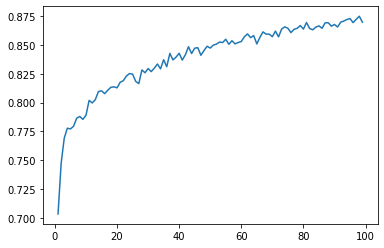

In [53]:
plt.plot(range_i,scores_i)

In [54]:
adaboost_2= AdaBoostClassifier()
param_grid= {'n_estimators':np.arange(1,100)}
adaboost_search=GridSearchCV(adaboost_2, param_grid, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')
adaboost_search.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

In [55]:
adaboost_search.best_params_

{'n_estimators': 97}

In [56]:
adaboost_search.best_score_

0.8737792082346723

### ROC for Ada boost

In [57]:
adaboost = AdaBoostClassifier(n_estimators=1)
adaboost.fit(xtrain,ytrain)
score_y = adaboost.predict_proba(xtest)

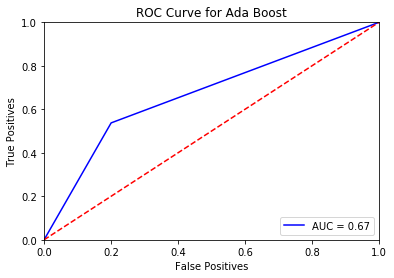

In [58]:
fp, tp, threshold = roc_curve(ytest, score_y[:, 1])
roc_auc = auc(fp, tp)

plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positives')
plt.xlabel('False Positives')
plt.title('ROC Curve for Ada Boost')
plt.show()

In [59]:
Final=pd.DataFrame({"Model implemented":"Ada boost","True Negatives":truenegative,
                    "False Positives":falsepositive,
                    "False Negatives":falsenegative,"True Positives":truepositive, "Accuracy score":[acc_adaboost],
                    'Train data time taken':time_elapsed_train,
                    'Test data time taken':time_elapsed_predict,
                    'Mean':adaboost_scores.mean(), 'Variance': adaboost_scores.var(), 'AUC' :roc_auc })
Final_Data=Final_Data.append(Final)  

### Decision tree model fit 

In [60]:
decision_tree=DecisionTreeClassifier(random_state=0)
time_start_train=t.perf_counter()
decision_tree.fit(xtrain,ytrain)
time_elapsed_train = (t.perf_counter() - time_start_train)
time_start_predict=t.perf_counter()
decisiontree_ypredict =decision_tree.predict(xtest)
time_elapsed_predict = (t.perf_counter() - time_start_predict)
acc_decisiontree=accuracy_score(decisiontree_ypredict,ytest)
truenegative,falsepositive,falsenegative,truepositive=confusion_matrix( decisiontree_ypredict,ytest).ravel() 

In [61]:
decisiontree_scores = cross_val_score(decision_tree, x, y, cv=StratifiedKFold(shuffle=True), scoring='roc_auc')

In [62]:
print ("Accuracy of decision tree base model fit:-\n", acc_decisiontree)
print ("D ecision tree base model confusion matrix:-\n", confusion_matrix(decisiontree_ypredict,ytest))
print("Cross validation scores for Decision tree", decisiontree_scores)
print('mean', decisiontree_scores.mean())
print('variance', decisiontree_scores.var())
print('Time taken to train data:',time_elapsed_train)
print('Time Taken for test data:',time_elapsed_predict)

Accuracy of decision tree base model fit:-
 0.9411764705882353
D ecision tree base model confusion matrix:-
 [[556   0]
 [ 53 292]]
Cross validation scores for Decision tree [0.96086957 0.9552795  0.9539801 ]
mean 0.9567097226084896
variance 8.933553552709396e-06
Time taken to train data: 0.013323490000004767
Time Taken for test data: 0.0006498700000179269


### ROC for Decision tree

In [63]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(xtrain,ytrain)
score_y = decisiontree.predict_proba(xtest)

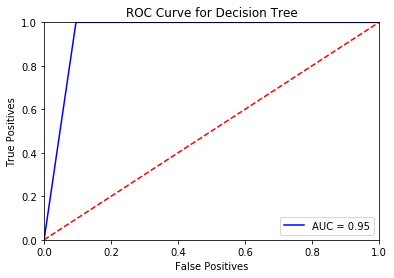

In [64]:
fp, tp, threshold = roc_curve(ytest, score_y[:, 1])
roc_auc = auc(fp, tp)

plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positives')
plt.xlabel('False Positives')
plt.title('ROC Curve for Decision Tree')
plt.show()

In [65]:
Final=pd.DataFrame({"Model implemented":"Decision Tree","True Negatives":truenegative,
                    "False Positives":falsepositive,
                    "False Negatives":falsenegative,"True Positives":truepositive, "Accuracy score":[acc_decisiontree],
                    'Train data time taken':time_elapsed_train,
                    'Test data time taken':time_elapsed_predict,
                    'Mean':decisiontree_scores.mean(), 'Variance': decisiontree_scores.var(), 'AUC' :roc_auc })
Final_Data=Final_Data.append(Final)  

In [66]:
Final_Data

,AUC,Accuracy score,False Negatives,False Positives,Mean,Model implemented,Test data time taken,Train data time taken,True Negatives,True Positives,Variance
0,0.938362,0.908990,82,0,0.952488,KNN,0.071104,0.006581,527,292,2.225369e-06
0,0.726182,0.720311,112,140,0.679702,Naive Bayes,0.001271,0.006827,497,152,4.241397e-04
0,0.981763,0.975583,22,0,0.999006,Random Forest,0.006736,0.036643,587,292,4.439131e-07
0,0.668671,0.714761,111,146,0.869656,Ada boost,0.003386,0.041446,498,146,2.906179e-04
0,0.952381,0.941176,53,0,0.956710,Decision Tree,0.000650,0.013323,556,292,8.933554e-06


In [70]:
Final_Data.to_excel('/Users/anandramesh/Desktop/Term 1/ML/Final_data.xlsx')